In [1]:
!pip install colorthief pandas pillow matplotlib

In [17]:
import pandas as pd

df = pd.read_csv("dataset_sephora-com-scraper_2025-04-03_04-22-12-380.csv")

# Preview the dataset
print(df.columns)
print(df[['brand', 'price','name', 'image']].head())

print(df['image'].head()) 

Index(['brand', 'detail_link', 'id', 'image', 'name', 'price',
       'quantity_rating', 'rating'],
      dtype='object')
             brand   price                                              name  \
0   Summer Fridays  $24.00             Lip Butter Balm for Hydration & Shine   
1  Tower 28 Beauty  $16.00  ShineOn Lip Jelly Hydrating Non-Sticky Lip Gloss   
2          LANEIGE  $22.00          Glaze Craze Tinted Polypeptide Lip Serum   
3             DIOR  $40.00                                      Lip Glow Oil   
4         Glossier  $16.00               Balm Dotcom Lip Balm and Skin Salve   

                                               image  
0  https://www.sephora.com/productimages/sku/s274...  
1  https://www.sephora.com/productimages/sku/s254...  
2  https://www.sephora.com/productimages/sku/s284...  
3  https://www.sephora.com/productimages/sku/s231...  
4  https://www.sephora.com/productimages/sku/s283...  
0    https://www.sephora.com/productimages/sku/s274...
1    https:/

In [21]:
import pandas as pd
import requests
import os
from urllib.parse import urlparse

# Load your CSV
df = pd.read_csv("dataset_sephora-com-scraper_2025-04-03_04-22-12-380.csv")

# Choose the right column name
image_column = "image"  # adjust if it's named differently
SAVE_DIR = "working_lip_images"
os.makedirs(SAVE_DIR, exist_ok=True)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0 Safari/537.36",
    "Referer": "https://www.sephora.com/"
}

for i, row in df.iterrows():
    url = str(row[image_column]).strip()
    try:
        if not url.startswith("http"):
            print(f"[❌] Skipping invalid URL: {url}")
            continue

        # Clean URL
        parsed = urlparse(url)
        ext = os.path.splitext(parsed.path)[-1]
        filename = f"lip_{i}{ext if ext else '.jpg'}"
        filepath = os.path.join(SAVE_DIR, filename)

        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            with open(filepath, 'wb') as f:
                f.write(response.content)
            print(f"[✓] Saved: {filename}")
            df.at[i, 'local_path'] = filepath
        else:
            print(f"[❌] Status {response.status_code}: {url}")

    except Exception as e:
        print(f"[⚠️] Error: {e} | URL: {url}")

[✓] Saved: lip_0.jpg
[✓] Saved: lip_1.jpg
[✓] Saved: lip_2.jpg
[✓] Saved: lip_3.jpg
[✓] Saved: lip_4.jpg
[✓] Saved: lip_5.jpg
[✓] Saved: lip_6.jpg
[✓] Saved: lip_7.jpg
[✓] Saved: lip_8.jpg
[✓] Saved: lip_9.jpg
[✓] Saved: lip_10.jpg
[✓] Saved: lip_11.jpg
[✓] Saved: lip_12.jpg
[✓] Saved: lip_13.jpg
[✓] Saved: lip_14.jpg
[✓] Saved: lip_15.jpg
[✓] Saved: lip_16.jpg
[✓] Saved: lip_17.jpg
[✓] Saved: lip_18.jpg
[✓] Saved: lip_19.jpg
[✓] Saved: lip_20.jpg
[✓] Saved: lip_21.jpg
[✓] Saved: lip_22.jpg
[✓] Saved: lip_23.jpg
[✓] Saved: lip_24.jpg
[✓] Saved: lip_25.jpg
[✓] Saved: lip_26.jpg
[✓] Saved: lip_27.jpg
[✓] Saved: lip_28.jpg
[✓] Saved: lip_29.jpg
[✓] Saved: lip_30.jpg
[✓] Saved: lip_31.jpg
[✓] Saved: lip_32.jpg
[✓] Saved: lip_33.jpg
[✓] Saved: lip_34.jpg
[✓] Saved: lip_35.jpg
[✓] Saved: lip_36.jpg
[✓] Saved: lip_37.jpg
[✓] Saved: lip_38.jpg
[✓] Saved: lip_39.jpg
[✓] Saved: lip_40.jpg
[✓] Saved: lip_41.jpg
[✓] Saved: lip_42.jpg
[✓] Saved: lip_43.jpg
[✓] Saved: lip_44.jpg
[✓] Saved: lip_45.jp

In [23]:
from colorthief import ColorThief
import colorsys

def rgb_to_hsl(r, g, b):
    r /= 255
    g /= 255
    b /= 255
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return int(h * 360), s, l

def classify_shade(h, s, l):
    if s < 0.2 and l > 0.7:
        return "Nude"
    elif 0 <= h <= 10 or 350 <= h <= 360:
        return "Red"
    elif 10 < h <= 40:
        return "Coral"
    elif 240 <= h <= 280:
        return "Purple"
    elif 280 < h <= 330:
        return "Berry"
    elif 330 < h < 350:
        return "Pink"
    else:
        return "Other"

dominant_colors = []
shade_classes = []

for path in df['local_path']:
    try:
        ct = ColorThief(path)
        rgb = ct.get_color(quality=1)
        h, s, l = rgb_to_hsl(*rgb)
        shade = classify_shade(h, s, l)
        dominant_colors.append(rgb)
        shade_classes.append(shade)
    except Exception as e:
        dominant_colors.append((0,0,0))
        shade_classes.append("Unknown")

df['dominant_rgb'] = dominant_colors
df['shade'] = shade_classes

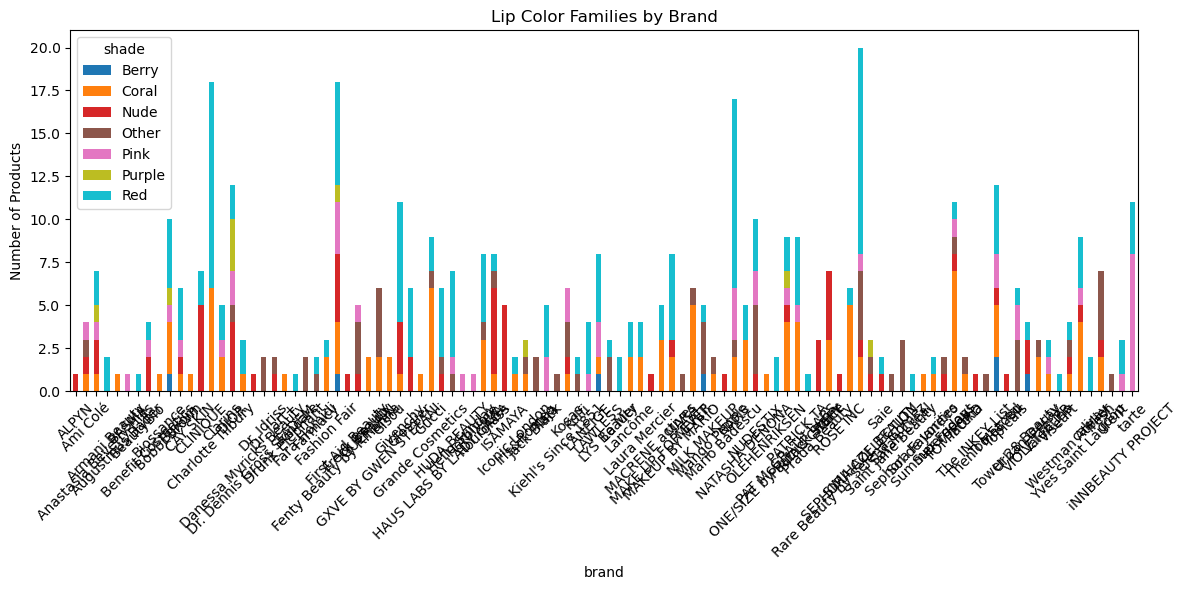

In [25]:
import matplotlib.pyplot as plt

pivot = df.groupby(['brand', 'shade']).size().unstack(fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Lip Color Families by Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Generate brand-specific palette strips
from PIL import Image, ImageDraw
def generate_palette_strip(colors, width=300, height=50):
    strip = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(strip)
    section_width = width // len(colors)
    for i, color in enumerate(colors):
        draw.rectangle([i * section_width, 0, (i+1) * section_width, height], fill=tuple(color))
    return strip

brands = df['brand'].unique()
import re

def safe_filename(name):
    return re.sub(r'[^A-Za-z0-9_-]', '_', name)

# Updated save logic
for brand in brands:
    top_colors = df[df['brand'] == brand]['dominant_rgb'].head(8).tolist()
    if top_colors:
        strip = generate_palette_strip(top_colors)
        filename = f"palette_{safe_filename(brand)}.png"
        strip.save(filename)

In [37]:
# Step 6: Export top palette hex values per brand
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

palette_data = []
for brand in brands:
    top_colors = df[df['brand'] == brand]['dominant_rgb'].value_counts().head(5).index.tolist()
    for color in top_colors:
        palette_data.append({"brand": brand, "hex_color": rgb_to_hex(color)})

palette_df = pd.DataFrame(palette_data)
palette_df.to_csv("brand_color_palettes.csv", index=False)

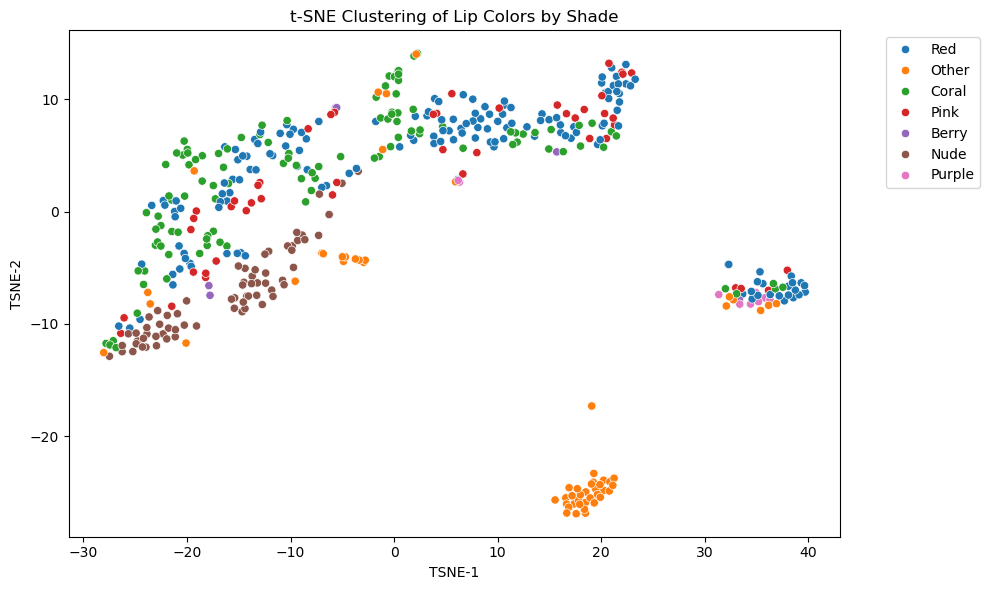

In [43]:
# Step 7: t-SNE clustering based on RGB colors
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
color_features = np.array(df['dominant_rgb'].tolist())
tsne = TSNE(n_components=2, random_state=42)
embeddings = tsne.fit_transform(color_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], hue=df['shade'], palette='tab10')
plt.title("t-SNE Clustering of Lip Colors by Shade")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [45]:
# Shade distribution by price range
if 'price' in df.columns:
    # Clean price (strip currency symbols)
    df['price_clean'] = pd.to_numeric(df['price'].replace('[^0-9.]', '', regex=True))
    df['price_bin'] = pd.cut(df['price_clean'], bins=[0, 15, 30, 45, 100], labels=['$0–15', '$15–30', '$30–45', '$45+'])

    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x='price_bin', hue='shade', palette='tab10')
    plt.title("Shade Distribution by Price Range")
    plt.xlabel("Price Bin")
    plt.ylabel("Number of Products")
    plt.legend(title='Shade', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

ValueError: Unable to parse string "24.0025.00" at position 13